## Classical NLP - With NLTK/SpaCy

Natural Language Processing, or NLP for short, is broadly defined as the automatic manipulation of natural language, like speech and text, by software.
The study of natural language processing has been around for more than 50 years and grew out of the field of linguistics with the rise of computers. 

As machine learning practitioners interested in working with text data, we are concerned with the tools and methods from the field of Natural Language Processing.



Text is an extremely rich source of information. Each minute, people send hundreds of millions of new emails and text messages. There’s a veritable mountain of text data waiting to be mined for insights. But data scientists who want to glean meaning from all of that text data face a challenge: it is difficult to analyze and process because it exists in **unstructured form**.

In this tutorial, we’ll take a look at how we can transform all of that unstructured text data into something more useful for analysis and natural language processing, using the helpful Python package spaCy [(documentation)](https://spacy.io/), NLTK [(docs)](https://www.nltk.org/) and scikit learn.

Once we’ve done this, we’ll be able to derive meaningful patterns and themes from text data. This is useful in a wide variety of data science applications: 
* spam filtering
* support tickets
* social media analysis
* contextual advertising
* reviewing customer feedback
* and more.

### Text tokenization

Tokenization is the process of breaking text into pieces, called tokens, and ignoring characters like punctuation marks (,. “ ‘) and spaces. spaCy‘s tokenizer takes input in form of unicode text and outputs a sequence of token objects:

In [1]:
%conda install spacy nltk

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/idodavid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/idodavid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/idodavid/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
text = """When learning data science, you shouldn't get discouraged!
Challenges and setbacks aren't failures, they're just part of the journey. You've got this!"""

text_tokens = nltk.word_tokenize(text)
text_tokens

['When',
 'learning',
 'data',
 'science',
 ',',
 'you',
 'should',
 "n't",
 'get',
 'discouraged',
 '!',
 'Challenges',
 'and',
 'setbacks',
 'are',
 "n't",
 'failures',
 ',',
 'they',
 "'re",
 'just',
 'part',
 'of',
 'the',
 'journey',
 '.',
 'You',
 "'ve",
 'got',
 'this',
 '!']

### Cleaning Text Data: Removing Stopwords


Most text data that we work with is going to contain a lot of words that aren’t actually useful to us. These words, called stopwords, are useful in human speech, but they don’t have much to contribute to data analysis. Removing stopwords helps us eliminate noise and distraction from our text data, and also speeds up the time analysis takes (since there are fewer words to process).

Let’s take a look at the stopwords spaCy includes by default:

In [4]:
stopwords=nltk.corpus.stopwords.words("english") + nltk.corpus.stopwords.words("italian") + nltk.corpus.stopwords.words("spanish")
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

**Removing Stopwords:**

In [5]:
[t for t in text_tokens if t in stopwords]

['you', 'should', 'and', 'are', 'they', 'just', 'of', 'the', 'this']

### Lexicon Normalization

In NLP, a lexicon is the set of words composing all known words. We will usually keep it as small as possible, but this changes depending on the problam we are trying to solve. One of the methods to keep a lexicon small is to normalize it using stemming/lemmatization, both ways of processing words that reduces them to their roots.

while words like connect, connection, connecting, connected, etc. aren’t exactly the same, they all have the same essential meaning: connect. The differences in spelling have grammatical functions in spoken language, but for machine processing, those differences can be confusing, so we need a way to change all the words that are forms of the word connect into the word connect itself.

In [6]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [7]:
ps = PorterStemmer()
words = ["program", "programs", "programmer", "programming", "programmers"]
 
for w in words:
    print(w, " : ", ps.stem(w))

program  :  program
programs  :  program
programmer  :  programm
programming  :  program
programmers  :  programm


### Part of Speech (POS) Tagging

A word’s part of speech defines its function within a sentence. A noun, for example, identifies an object. An adjective describes an object. A verb describes action. Identifying and tagging each word’s part of speech in the context of a sentence is called Part-of-Speech Tagging, or POS Tagging.

In [8]:
from nltk import pos_tag

In [9]:
text ="learn about natural language processing is easy and fun"
tokens =  nltk.word_tokenize(text)
tokens_tag = pos_tag(tokens)
for token, token_tag in zip(tokens, tokens_tag):
    print(token, token_tag)

learn ('learn', 'NN')
about ('about', 'IN')
natural ('natural', 'JJ')
language ('language', 'NN')
processing ('processing', 'NN')
is ('is', 'VBZ')
easy ('easy', 'JJ')
and ('and', 'CC')
fun ('fun', 'NN')


### More NLP tools

* Entity Detection - Entity detection, also called entity recognition, is a more advanced form of language processing that identifies important elements like places, people, organizations, and languages within an input string of text. This is really helpful for quickly extracting information from text, since you can quickly pick out important topics or indentify key sections of text.
* Dependency Parsing - Depenency parsing is a language processing technique that allows us to better determine the meaning of a sentence by analyzing how it’s constructed to determine how the individual words relate to each other:
![alt](https://www.dataquest.io/wp-content/uploads/2019/04/text-expressions-python-chart-1.png)
* Word Vector Representation - A word vector is a numeric representation of a word that commuicates its relationship to other words, Also known as embedding vector

## The Bag of words model

The Bag of Words (BoW) model is the simplest form of text representation in numbers. Like the term itself, we can represent a sentence as a bag of words vector (a string of numbers).

Let’s recall the three types of movie reviews we saw earlier:

* Review 1: This movie is very scary and long
* Review 2: This movie is not scary and is slow
* Review 3: This movie is spooky and good

We will first build a vocabulary from all the unique words in the above three reviews. The vocabulary consists of these 11 words: ‘This’, ‘movie’, ‘is’, ‘very’, ‘scary’, ‘and’, ‘long’, ‘not’,  ‘slow’, ‘spooky’,  ‘good’.

We can now take each of these words and mark their occurrence in the three movie reviews above with 1s and 0s. This will give us 3 vectors for 3 reviews:



![alt](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/BoWBag-of-Words-model-2.png)

Drawbacks of using a Bag-of-Words (BoW) Model:
    
In the above example, we can have vectors of length 11. However, we start facing issues when we come across new sentences:

* Out of Vocabulary words (OOV) - If the new sentences contain new words, then our vocabulary size would increase and thereby, the length of the vectors would increase too.
* Sparsity - the vectors contain many 0s, thereby resulting in a sparse matrix 
* We are retaining no information on the grammar of the sentences nor on the ordering of the words in the text

<div class="alert alert-block alert-warning">
<b>Consider the following sentneces:
<ul>
    <li> The movie was bad. Not good at all. </li>
    <li> The movive was good. Not bad at all. </li>
</ul>
     

What would be their bag-of-words representation? </b>
</div>

## Term Frequency and Inverse Document Frequency (TF-IDF)


Term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.
* Term frequency - The number of times a word appeared in the text
* Inverse document frequency - A measure of how unique is a given word 

### Term Frequency (TF)

The number of times the token “t” appears in the document “d”:

![alt](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/tf.jpg)

![alt](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/TF-matrix-1.png)

### Inverse Document Frequency (IDF)


IDF is a measure of how important a term is. We need the IDF value because computing just the TF alone is not sufficient to understand the importance of words (The word "The" would have a high TF value cause it is used a lot, but it bears very minimal information):

![alt](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/idf.jpg)

![alt](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/IDF-matrix.png)

<div class="alert alert-block alert-warning">
<b>Consider the following sentneces:
<ul>
    <li> The movie was bad. Not good at all. </li>
    <li> The movive was good. Not bad at all. </li>
</ul>
     

What would be their bag-of-words representation? </b>
</div>

# Text classification

In [10]:
import pandas as pd

In [11]:
bad = pd.read_csv('data/bad_tweets.txt', names = ['id','tweet'], sep='\t')
good = pd.read_csv('data/good_tweets.txt', names = ['id','tweet'], sep='\t')

In [12]:
bad.shape, good.shape

((3490, 2), (3522, 2))

In [13]:
bad.head()

,id,tweet
0,100068216876965888,Social Media - Impact of Social Media on Small...
1,100523164500631552,Local Business Blogging - What to Blog About h...
2,100991945391878144,13 Hot Facebook Marketing Tips From the Top Pr...
3,101021386058903553,"Short of blog ideas? ""Local Business Blogging ..."
4,101417008050094080,Eleven Books That Will Rock Your World http://...


## Data exploration

In [84]:
%pip install cufflinks

In [15]:
from pandas import * 
import cufflinks as cf; cf.go_offline()

In [16]:
set_option('display.max_colwidth',200)

In [17]:
good['cls'] = 1
good.sample(5)

,id,tweet,cls
95,161580880006090752,"@nakedlaughing fair enough I was just wondering, I was not a big fan of the iPhone until I got one",1
2108,403498585666236416,@shermeydane Sira! Hahahaha. Ikaw ha!,1
3238,457996584933138432,"I'm taking a break from wow so what do I do? Play #Hearthstone of course, makes perfect sense #notevenclosetosmart",1
1418,394137536068849664,@SimoneTheWanted @SivaTheWanted Lol a yes they fit would be fine ;),1
2403,407995412843618304,@GypsyLullaby7 #PaleandTasty http://t.co/O6PRyCUm4J,1


In [18]:
bad['cls'] = 0
bad.sample(5)

,id,tweet,cls
1992,295038233778196480,"If you've never studied English before, the True Stories English Fluency Course probably won't help you - http://t.co/F4hdJ2i6",0
2848,467696425417973760,RT @Brylane_Home: RT &amp; follow us to win $100 Mystery Prize A #bhomegiveaway NoPurNec18+RulesApply@ http://t.co/T9zDRFnIB4 http://t.co/90Hfaâ€¦,0
750,281387530723684352,Brother 5300 Universal Sewing Machine Carrying Case - by Brother http://t.co/VfO0xmYO,0
300,165933956456386560,FEAR F=False E=Evidence A=Appearing R=Real Remember this next time you get that feeling! @csspecialists [Very true; mind can amplify FEAR],0
1945,294412160950489091,Mediterranean Diet for the Heart - Learn the secrets of healthy living that the Mediterraneans have known,0


In [19]:
df = good.append(bad, ignore_index = True)
df.cls.value_counts()

/var/folders/bs/g6pz0yts3fg0jn57qwt68lt80000gn/T/ipykernel_55400/2752880091.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1    3522
0    3490
Name: cls, dtype: int64

## Content based model

In [20]:
%pip install ttp

Note: you may need to restart the kernel to use updated packages.


In [21]:
%pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [22]:
import string
import emoji
import re as regex

In [23]:
specialChars = ''.join([",", ":", "\"", "=", "&", ";", "%", "$","@", "%", "^", "*", "(", ")", "{", "}",'–','“', '”'
                      "[", "]", "|", "/", "\\", ">", "<", "-","!", "?", ".", "'","--", "---", "#", '‘', '’', '…'])  
space_chars = ['.',',',';', '&', '?','!']
def remove_by_regex(tweets, regexp):
    return tweets.replace(regexp, "")

def remove_urls(tweets):
    return remove_by_regex(tweets, regex.compile(r"http\S+"))

def remove_special_chars(tweets): 
    return tweets.apply(lambda tweet: ''.join([c for c in tweet if c not in specialChars]))

def remove_usernames(tweets):
    return remove_by_regex(tweets, regex.compile(r"@[^\s]+[\s]?"))

def remove_numbers(tweets):
    return remove_by_regex(tweets, regex.compile(r"\s?[0-9]+\.?[0-9]*"))

def remove_emojis(tweets):
    return tweets.apply(lambda tweet: ''.join(c for c in tweet if c not in emoji.distinct_emoji_list(tweet)))

def add_spaces(tweets):
    def add_spaces_int(tweet):
        for char in space_chars:
            tweet = tweet.replace(char, char + ' ')
        return tweet
    return tweets.apply(lambda tweet: add_spaces_int(tweet))

def leave_language_only(tweets):
    for f in [remove_urls, remove_emojis, add_spaces, remove_numbers, remove_usernames, remove_special_chars]:
        tweets = f(tweets)
    return tweets

In [24]:
df['pureTextTweet'] = leave_language_only(df.tweet.str.lower())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7012 entries, 0 to 7011
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             7012 non-null   int64 
 1   tweet          7012 non-null   object
 2   cls            7012 non-null   int64 
 3   pureTextTweet  7012 non-null   object
dtypes: int64(2), object(2)
memory usage: 219.2+ KB


In [25]:
df[['tweet','pureTextTweet']].sample(5)

,tweet,pureTextTweet
3543,How to Create Value and Build Customer Loyalty: http://t.co/GE1IFVX,how to create value and build customer loyalty
3867,RT @BousquetCMP New #Blogboost Post: 4 Types Of Public Speakers-Which Speaking Style Is Yours? http://t.co/MMelNxi4 [Important differences!],rt new blogboost post types of public speakerswhich speaking style is yours important differences
5573,Gostei de um vÃ­deo @YouTube http://t.co/y9Zi29bFUg - Forget To Remember,gostei de um vã­deo forget to remember
572,RT @justinbieber: regardless of what happens i see all of the tweets and all the love you guys are sending me. thank u. love u too #SUND ...,rt regardless of what happens i see all of the tweets and all the love you guys are sending me thank u love u too sund
2894,In a way,in a way


In [26]:
stopwords=nltk.corpus.stopwords.words("english") + nltk.corpus.stopwords.words("italian") + nltk.corpus.stopwords.words("spanish")
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

In [27]:
nltk.word_tokenize(df.pureTextTweet.iloc[0])

['what',
 'a',
 'great',
 'tip',
 'ali',
 'no',
 'more',
 'leaving',
 'things',
 'behind',
 'and',
 'having',
 'to',
 'call',
 'the',
 'hotel',
 'in',
 'a',
 'panic']

In [28]:
all_words = [word for tweet in df.pureTextTweet for word in nltk.word_tokenize(tweet) if word.lower() not in stopwords] # Words without stop words
words_df = DataFrame(data = all_words, columns = ['word']).word.value_counts().reset_index()
words_df.columns = ['word','wordCount']
words_df['wordImportance'] = len(words_df) / words_df.wordCount / words_df.wordCount.max()
words_df.head()

,word,wordCount,wordImportance
0,rt,1338,0.007115
1,win,507,0.018776
2,giveaway,452,0.021061
3,enter,299,0.031838
4,im,279,0.034120


In [82]:
%pip install --upgrade nbformat

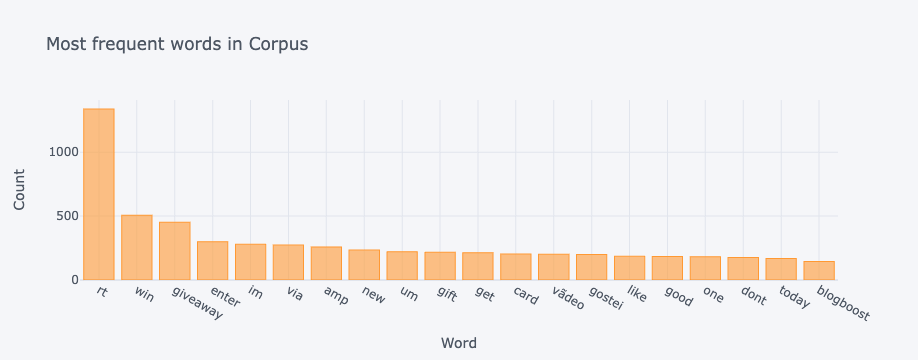

In [30]:
words_df.set_index('word').wordCount.head(20).iplot(kind = 'bar', title = 'Most frequent words in Corpus', yTitle = 'Count', xTitle = 'Word')

In [31]:
print("Total of {} words, {} unique words".format(len(all_words), len(words_df)))

Total of 50795 words, 12737 unique words


to reduce the corpus size more, we probably don't care about words that appear to little. Let's drop any word which have under 5 appearnces:

In [32]:
print ("Using words with 5 or more appearnces will reduce the corpus size to: {}".format(sum(words_df.wordCount >= 5)))

Using words with 5 or more appearnces will reduce the corpus size to: 2015


In [33]:
words_df = words_df[words_df.wordCount >= 5]

### Bag of words (One-hot-encoding)

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [88]:
test_df, train_df = train_test_split(df, test_size=0.8, random_state=42)
train_df.shape, test_df.shape

((5610, 10), (1402, 10))

In [103]:
all_words = [word for tweet in train_df.pureTextTweet for word in nltk.word_tokenize(tweet) if word.lower() not in stopwords] # Words without stop words
words_df = DataFrame(data = all_words, columns = ['word']).word.value_counts().reset_index()
words_df.columns = ['word','wordCount']
words_df = words_df[words_df.wordCount > 3]
words_df.shape

(2110, 2)

In [104]:
clean_vocab = set(words_df.word)
count_vect = CountVectorizer(vocabulary = clean_vocab, tokenizer=nltk.word_tokenize)
train_bow_counts = count_vect.fit_transform(train_df.pureTextTweet)
test_bow_counts = count_vect.transform(test_df.pureTextTweet)
train_bow_counts.shape, test_df.shape

/Users/idodavid/miniforge3/envs/python_ml/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



((5610, 2110), (1402, 10))

In [105]:
train_df.iloc[0].pureTextTweet

'rt your chérie amour will simply adore the new sweet monogram insolite wallet  how chic   '

In [106]:
print(train_bow_counts[0])

  (0, 1223)	1
  (0, 1521)	1
  (0, 1622)	1
  (0, 1760)	1


In [108]:
rev_dict = {v:k for k,v in count_vect.vocabulary_.items()}
print(rev_dict[1223])
print(rev_dict[1521])
print(rev_dict[1622])
print(rev_dict[1760])

new
rt
simply
sweet


In [110]:
tf_idf_vectorizer = TfidfVectorizer(vocabulary = clean_vocab)
train_bow_tfidf = tf_idf_vectorizer.fit_transform(train_df.pureTextTweet)
test_bow_tfidf = tf_idf_vectorizer.transform(test_df.pureTextTweet)
train_bow_tfidf, test_bow_tfidf

(<5610x2110 sparse matrix of type '<class 'numpy.float64'>'
 	with 26633 stored elements in Compressed Sparse Row format>,
 <1402x2110 sparse matrix of type '<class 'numpy.float64'>'
 	with 6155 stored elements in Compressed Sparse Row format>)

## Classification

In [111]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score

In [112]:
from sklearn.linear_model import LogisticRegression

In [114]:
%%capture
search_grid = np.logspace(-2, 4, num=50, endpoint=True, base=10.0)
auc_by_alpha = []
for alpha in search_grid:
    model = LogisticRegression(penalty='l2', C=alpha)
    avg_score = cross_val_score(model, train_bow_counts, y = train_df.cls, cv = 10, scoring = 'roc_auc').mean()
    auc_by_alpha.append((alpha,avg_score))

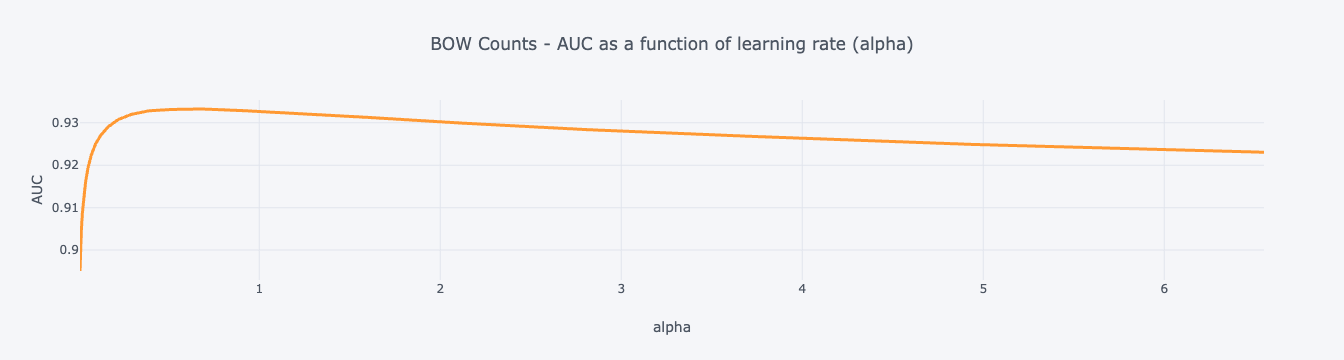

In [115]:
cv_results = DataFrame(auc_by_alpha, columns = ['alpha', 'AUC'])
cv_results.query('alpha < 8').set_index('alpha').AUC.iplot(title = 'BOW Counts - AUC as a function of learning rate (alpha)', xTitle = 'alpha', yTitle = 'AUC', width = 3, hline=(0,0))

In [116]:
opt_alpha, max_auc = cv_results.loc[cv_results.AUC.idxmax()]
print(opt_alpha, max_auc)

0.6866488450043002 0.9332385613932667


### Optimal Model

Let's use the optimal model regularization parameter and train a model on the **entire dataset**:

In [117]:
model = LogisticRegression(penalty='l2', C=opt_alpha)
model.fit(train_bow_counts, train_df.cls)

LogisticRegression(C=0.6866488450043002)

In [118]:
test_df['predicted_class'] = model.predict(test_bow_counts)
test_df[['class_0_prob','class_1_prob']] = model.predict_proba(test_bow_counts)
test_df['prediction_certainty'] = test_df.apply(lambda row: row.class_0_prob if row.predicted_class == 0 else row.class_1_prob, axis=1)

In [119]:
accuracy_score(test_df.predicted_class, test_df.cls) # Training accuracy, for sanity only

0.8452211126961484

### Feature importance

In [120]:
weights = model.coef_.flatten()
words = [rev_dict[i] for i in range(len(weights))]
feature_weights = DataFrame({'word': words, 'weight': weights, 'absW': abs(weights)})
feature_weights.sort_values(by = 'absW', ascending = False, inplace = True)
feature_weights.head(5)

,word,weight,absW
751,giveaway,-2.687704,2.687704
1949,via,-2.281838,2.281838
189,blogboost,-1.980356,1.980356
1062,lol,1.840904,1.840904
1803,thank,1.799492,1.799492


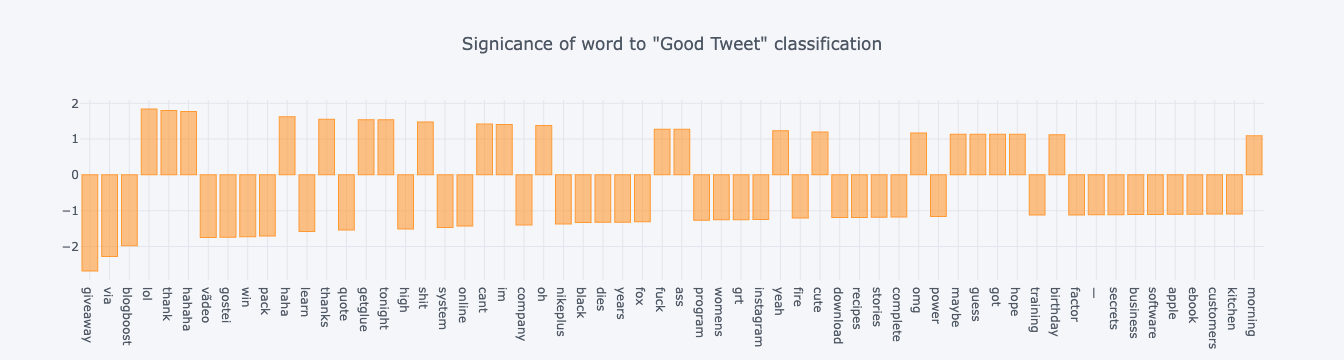

In [121]:
feature_weights.set_index('word').weight.head(60).iplot(kind = 'bar', title = 'Signicance of word to "Good Tweet" classification', hline=(0,0))


So we see that giveaway, via and blogboost are all highly indicative of a bot generated tweet, while haha is the most signifcant indication of a good tweet. 

<span style='background :yellow' > Class discussion: Suggests methods to verify that the results presented are indeed correct and there's no bug in the process of extraction feature importance</span>

In [122]:
df[df.tweet.apply(lambda x: 'haha' in x)].cls.value_counts()

1    79
Name: cls, dtype: int64

## Improving the initial model

To understand to imidiate steps to improve the model, let's look at the most significant errors, i.e., all the examples on which the model was very confident at the wrong class.

In [123]:
test_df['is_pred_error'] = test_df.cls != test_df.predicted_class

In [124]:
test_df[test_df.is_pred_error].sort_values(by='prediction_certainty', ascending=False).head(10)

,id,tweet,cls,pureTextTweet,predicted_class,class_0_prob,class_1_prob,prediction_certainty,is_pred_error,original_lower_cased_tweet
3766,154434078588940288,Winter has arrived in South Florida and I'm not liking it!Temps to go down to 30's tonight.Hope farmers able to harvest strawberries in time,0,winter has arrived in south florida and im not liking it temps to go down tos tonight hope farmers able to harvest strawberries in time,1,0.004067,0.995933,0.995933,True,winter has arrived in south florida and i'm not liking it!temps to go down to 30's tonight.hope farmers able to harvest strawberries in time
5496,294779844296847360,I realized that going to community college actually gave me double the friends I would have had going str,0,i realized that going to community college actually gave me double the friends i would have had going str,1,0.037148,0.962852,0.962852,True,i realized that going to community college actually gave me double the friends i would have had going str
6985,92053939649904640,"â€It starts with respect.If you respect the customer and honor their right to be treated fairly & honestly,every thing else is much easier.â€",0,â€it starts with respect if you respect the customer and honor their right to be treated fairly honestly every thing else is much easier â€,1,0.043986,0.956014,0.956014,True,"â€it starts with respect.if you respect the customer and honor their right to be treated fairly & honestly,every thing else is much easier.â€"
4565,283159466336202752,If you are on this site right now I think it is safe to say that you would like to have all of those thin http://t.co/QdFq2nLI,0,if you are on this site right now i think it is safe to say that you would like to have all of those thin,1,0.069717,0.930283,0.930283,True,if you are on this site right now i think it is safe to say that you would like to have all of those thin http://t.co/qdfq2nli
3890,178476067663781889,Happy Saturday morning to you as well @MarthaGiffen Make it a fabulous weekend!,0,happy saturday morning to you as well make it a fabulous weekend,1,0.076399,0.923601,0.923601,True,happy saturday morning to you as well @marthagiffen make it a fabulous weekend!
5805,425991714126712832,RT @VogueParis: Go backstage at @CHANEL's couture Spring/Summer show and see all the make-up looks from the runway http://t.co/exkI6Cqdfl,0,rt go backstage at couture springsummer show and see all the makeup looks from the runway,1,0.078957,0.921043,0.921043,True,rt @vogueparis: go backstage at @chanel's couture spring/summer show and see all the make-up looks from the runway http://t.co/exki6cqdfl
6553,468344906620993538,@familyfocusblog Hi Scarlet. My weekend was busy but good! Hope you have a great week!,0,hi scarlet my weekend was busy but good hope you have a great week,1,0.081605,0.918395,0.918395,True,@familyfocusblog hi scarlet. my weekend was busy but good! hope you have a great week!
3510,66647235529687040,@dannychoo I want to watch it but it says I have to wait until May 19 to watch full episodes. T__T,1,i want to watch it but it says i have to wait until may to watch full episodes t__t,0,0.912530,0.087470,0.912530,True,@dannychoo i want to watch it but it says i have to wait until may 19 to watch full episodes. t__t
3600,126645352840445952,Life is an escalator: You can move forward or backward; you can not remain still. Patricia Russell-MCCloud [Must know your destination],0,life is an escalator you can move forward or backward you can not remain still patricia russellmccloud must know your destination,1,0.097250,0.902750,0.902750,True,life is an escalator: you can move forward or backward; you can not remain still. patricia russell-mccloud [must know your destination]
4858,284814790008901632,Newt Gingrich On Mitt Romney: 'I Would Have Probably Done Better' Against ... -,0,newt gingrich on mitt romney i would have probably done better against,1,0.100605,0.899395,0.899395,True,newt gingrich on mitt romney: 'i would have probably done better' against

We can see some patterns:
* What makes good/bad is not clear, and sometimes seems erroneous
* Bad tweets often contain dollars, hashtags, @s and links - are those captured in the vocabulary we've created? * 

<span style='background :yellow' > Class discussion: Suggests methods to verify that the characters discussed above are in the corpus and are available for the classifier</span>

In [125]:
for c in ['@', '#', '$','http']: 
    for token in clean_vocab:
        if c in token:
            print(token, c)

<span style='background :yellow' > Class discussion: Suggests methods to include the missing information to the classifier</span>

In [56]:
nltk.word_tokenize("I just joined #naturebox and can't wait to start snacking. Get $10 off these awesome snacks too: http://t.co/V3BLDmHKYg by @NatureBox	")

['I',
 'just',
 'joined',
 '#',
 'naturebox',
 'and',
 'ca',
 "n't",
 'wait',
 'to',
 'start',
 'snacking',
 '.',
 'Get',
 '$',
 '10',
 'off',
 'these',
 'awesome',
 'snacks',
 'too',
 ':',
 'http',
 ':',
 '//t.co/V3BLDmHKYg',
 'by',
 '@',
 'NatureBox']

We have several options:
* Working on the original text without "cleaning it", or doing a better clean up job to not clean relevant information
* Add some ad-hoc features to the the bag-of-words vector

## Working on the original text

In [129]:
df['original_lower_cased_tweet'] = df.tweet.str.lower()

In [130]:
test_df, train_df = train_test_split(df, test_size=0.8, random_state=42)
train_df.shape, test_df.shape

((5610, 10), (1402, 10))

In [131]:
all_words = [word for tweet in train_df.original_lower_cased_tweet for word in nltk.word_tokenize(tweet) if word not in stopwords] # Words without stop words
words_df = DataFrame(data = all_words, columns = ['word']).word.value_counts().reset_index()
words_df.columns = ['word','wordCount']
words_df.head()

,word,wordCount
0,:,4874
1,@,4025
2,http,3036
3,!,2345
4,#,2145


In [132]:
print("Total of {} words, {} unique words".format(len(all_words), len(words_df)))
print ("Using words with 5 or more appearnces will reduce the corpus size to: {}".format(sum(words_df.wordCount >= 5)))

Total of 75373 words, 15660 unique words
Using words with 5 or more appearnces will reduce the corpus size to: 1929


In [134]:
vocab = set(words_df[words_df.wordCount >= 3].word)
count_vect = CountVectorizer(vocabulary = vocab, tokenizer=nltk.word_tokenize)
train_bow_counts = count_vect.fit_transform(train_df.original_lower_cased_tweet)
test_bow_counts = count_vect.transform(test_df.original_lower_cased_tweet)
train_bow_counts.shape, test_bow_counts.shape

/Users/idodavid/miniforge3/envs/python_ml/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



((5610, 3499), (1402, 3499))

In [138]:
train_df.iloc[1].original_lower_cased_tweet

'and here i thought the 92% was bad -___-ll'

In [141]:
print(train_bow_counts[1])

  (0, 3)	1
  (0, 253)	1
  (0, 456)	1
  (0, 3062)	1


In [142]:
rev_dict = {v:k for k,v in count_vect.vocabulary_.items()}
print(rev_dict[3])
print(rev_dict[253])
print(rev_dict[456])
print(rev_dict[3062])

%
92
bad
thought


## Classification

In [143]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score

In [144]:
from sklearn.linear_model import LogisticRegression

In [145]:
%%capture
search_grid = np.logspace(-2, 4, num=50, endpoint=True, base=10.0)
auc_by_alpha = []
for alpha in search_grid:
    model = LogisticRegression(penalty='l2', C=alpha)
    avg_score = cross_val_score(model, train_bow_counts, y = train_df.cls, cv = 10, scoring = 'roc_auc').mean()
    auc_by_alpha.append((alpha,avg_score))

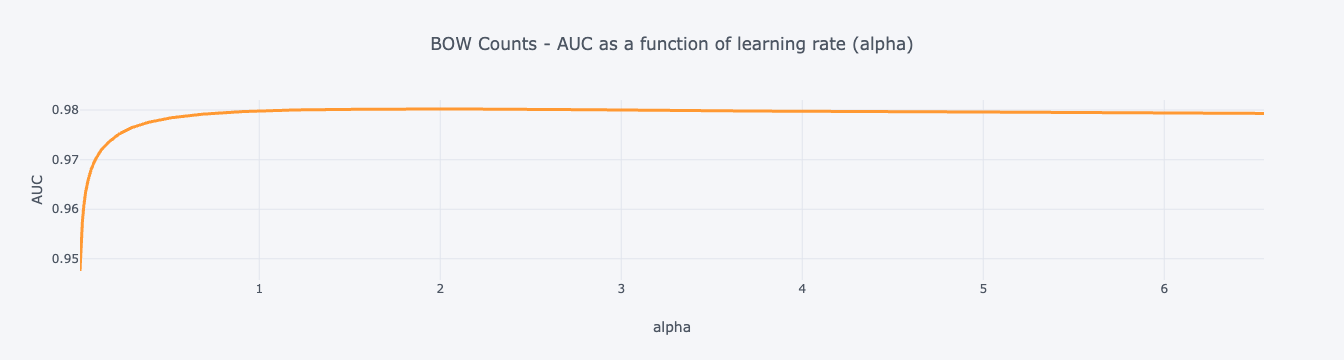

In [146]:
cv_results = DataFrame(auc_by_alpha, columns = ['alpha', 'AUC'])
cv_results.query('alpha < 8').set_index('alpha').AUC.iplot(title = 'BOW Counts - AUC as a function of learning rate (alpha)', xTitle = 'alpha', yTitle = 'AUC', width = 3, hline=(0,0))

In [148]:
opt_alpha, max_auc = cv_results.loc[cv_results.AUC.idxmax()]
print(opt_alpha, max_auc)

2.1209508879201904 0.9802157396173857


### Optimal Model

Let's use the optimal model regularization parameter and train a model on the **entire dataset**:

In [182]:
model = LogisticRegression(penalty='l2', C=opt_alpha, max_iter=10000)
model.fit(train_bow_counts, train_df.cls)

LogisticRegression(C=1.5998587196060574, max_iter=10000)

In [183]:
test_df['predicted_class'] = model.predict(test_bow_counts)
test_df[['class_0_prob','class_1_prob']] = model.predict_proba(test_bow_counts)
test_df['prediction_certainty'] = test_df.apply(lambda row: row.class_0_prob if row.predicted_class == 0 else row.class_1_prob, axis=1)

In [184]:
accuracy_score(test_df.predicted_class, test_df.cls)

0.9522111269614836

### Feature importance

In [155]:
weights = model.coef_.flatten()
words = [rev_dict[i] for i in range(len(weights))]
feature_weights = DataFrame({'word': words, 'weight': weights, 'absW': abs(weights)})
feature_weights.sort_values(by = 'absW', ascending = False, inplace = True)
feature_weights.head(5)

,word,weight,absW
21,-,-4.272479,4.272479
1720,justinbieber,4.256776,4.256776
3099,tmr15,3.320326,3.320326
1385,getglue,3.038992,3.038992
1398,giveaway,-2.736973,2.736973


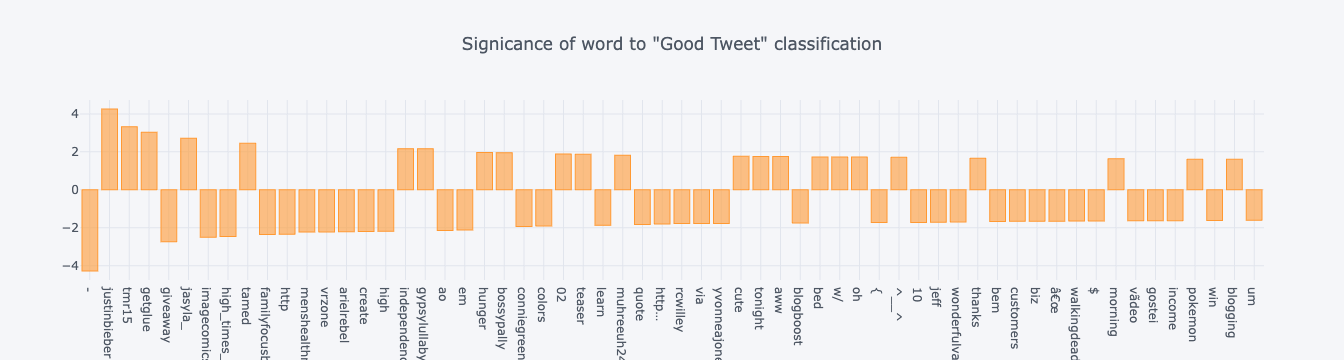

In [156]:
feature_weights.set_index('word').weight.head(60).iplot(kind = 'bar', title = 'Signicance of word to "Good Tweet" classification', hline=(0,0))


## Hand crafted features

In [157]:
def extract_featurs(tweet):
    return pd.Series({'has_at': '@' in tweet,
                      'has_url': 'http' in tweet,
                      'has_giveaway': 'giveaway' in tweet,
                      'has_blogboost': 'blog_boost' in tweet,
                      'has_dollar': '$' in tweet,
                      'has_hashtags': '#' in tweet })

In [159]:
train_features = train_df.original_lower_cased_tweet.apply(extract_featurs)
test_features = test_df.original_lower_cased_tweet.apply(extract_featurs)
train_features.head()

,has_at,has_url,has_giveaway,has_blogboost,has_dollar,has_hashtags
5921,True,True,False,False,False,False
3470,False,False,False,False,False,False
245,True,False,False,False,False,False
4506,False,False,False,False,False,False
4122,False,True,False,False,False,False


In [160]:
%%capture
search_grid = np.logspace(-2, 4, num=50, endpoint=True, base=10.0)
auc_by_alpha = []
for alpha in search_grid:
    model = LogisticRegression(penalty='l2', C=alpha)
    avg_score = cross_val_score(model, train_features, y = train_df.cls, cv = 10, scoring = 'roc_auc').mean()
    auc_by_alpha.append((alpha,avg_score))

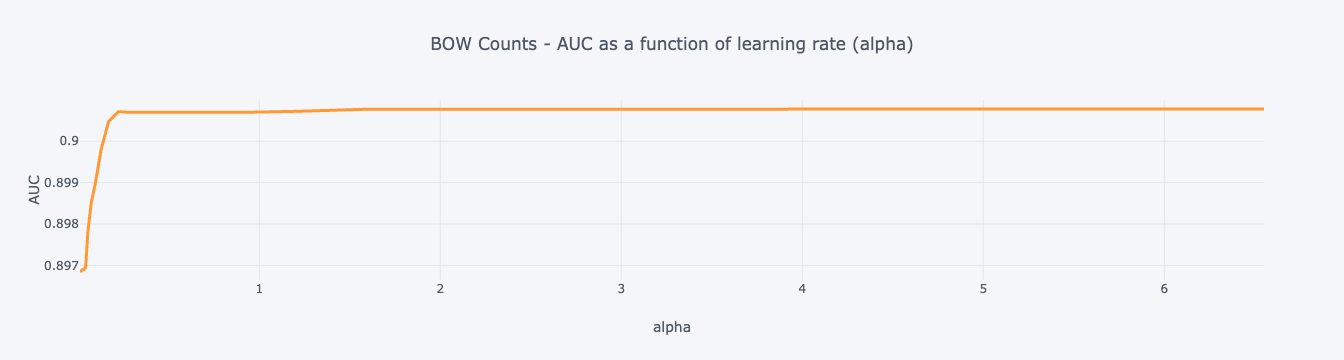

In [161]:
cv_results = DataFrame(auc_by_alpha, columns = ['alpha', 'AUC'])
cv_results.query('alpha < 8').set_index('alpha').AUC.iplot(title = 'BOW Counts - AUC as a function of learning rate (alpha)', xTitle = 'alpha', yTitle = 'AUC', width = 3, hline=(0,0))

In [162]:
opt_alpha, max_auc = cv_results.loc[cv_results.AUC.idxmax()]
print(opt_alpha, max_auc)

11.513953993264469 0.9007963739360549


Good training result. Let's check on the test:

In [169]:
model = LogisticRegression(penalty='l2', C=opt_alpha, max_iter=10000)
model.fit(train_features, train_df.cls)

LogisticRegression(C=11.513953993264469, max_iter=10000)

In [165]:
test_df['predicted_class'] = model.predict(test_features)
test_df[['class_0_prob','class_1_prob']] = model.predict_proba(test_features)
test_df['prediction_certainty'] = test_df.apply(lambda row: row.class_0_prob if row.predicted_class == 0 else row.class_1_prob, axis=1)

In [170]:
accuracy_score(test_df.predicted_class, test_df.cls)

0.8509272467902995

So we can see that reasonable results can be achieved by very few features.

## Using Words + additinal featurs

In [178]:
from scipy.sparse import coo_matrix, hstack
train_features_spares_matrix = coo_matrix(train_features)
train_united_features = hstack((train_bow_counts ,train_features_spares_matrix))

test_features_spares_matrix = coo_matrix(test_features)
test_united_features = hstack((test_bow_counts ,test_features_spares_matrix))

In [173]:
%%capture
search_grid = np.logspace(-2, 4, num=50, endpoint=True, base=10.0)
auc_by_alpha = []
for alpha in search_grid:
    model = LogisticRegression(penalty='l2', C=alpha)
    avg_score = cross_val_score(model, train_united_features, y = train_df.cls, cv = 10, scoring = 'roc_auc').mean()
    auc_by_alpha.append((alpha,avg_score))

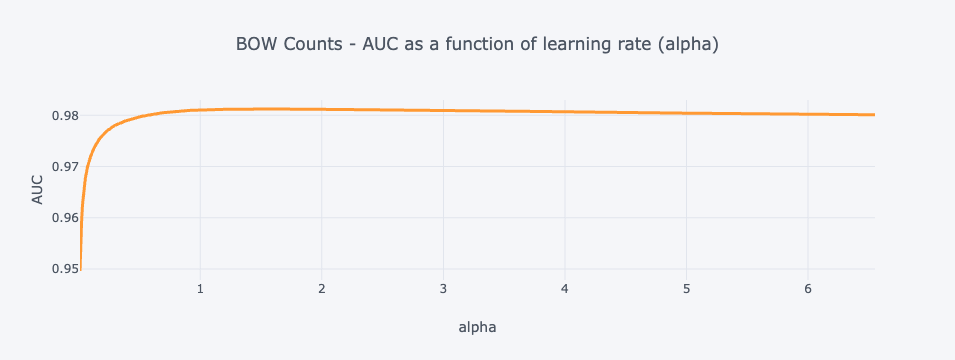

In [174]:
cv_results = DataFrame(auc_by_alpha, columns = ['alpha', 'AUC'])
cv_results.query('alpha < 8').set_index('alpha').AUC.iplot(title = 'BOW Counts - AUC as a function of learning rate (alpha)', xTitle = 'alpha', yTitle = 'AUC', width = 3, hline=(0,0))

In [176]:
opt_alpha, max_auc = cv_results.loc[cv_results.AUC.idxmax()]
print(opt_alpha, max_auc)

1.5998587196060574 0.981238881176283


In [179]:
model = LogisticRegression(penalty='l2', C=opt_alpha, max_iter=10000)
model.fit(train_united_features, train_df.cls)

LogisticRegression(C=1.5998587196060574, max_iter=10000)

In [180]:
test_df['predicted_class'] = model.predict(test_united_features)
test_df[['class_0_prob','class_1_prob']] = model.predict_proba(test_united_features)
test_df['prediction_certainty'] = test_df.apply(lambda row: row.class_0_prob if row.predicted_class == 0 else row.class_1_prob, axis=1)

In [181]:
accuracy_score(test_df.predicted_class, test_df.cls)

0.9522111269614836

And we can see that by including the missing information we are getting some of the benfits of using the non-cleaned vocabulary